In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model

In [11]:
inputs=Input(shape=(1,))
x=Dense(32,activation="relu")(inputs)
x=Dense(64,activation="relu")(x)
x=Dense(128,activation="relu")(x)
outputs=Dense(1)(x)
model=Model(inputs=inputs,outputs=outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
def polonominal(x):
    return 7*x*x-12*x*x-22*x+7

In [15]:
import numpy as np
x_train=np.arange(-20,20,0.2)
y_train=polonominal(x_train)
print(x_train)
print(y_train)

[-2.00000000e+01 -1.98000000e+01 -1.96000000e+01 -1.94000000e+01
 -1.92000000e+01 -1.90000000e+01 -1.88000000e+01 -1.86000000e+01
 -1.84000000e+01 -1.82000000e+01 -1.80000000e+01 -1.78000000e+01
 -1.76000000e+01 -1.74000000e+01 -1.72000000e+01 -1.70000000e+01
 -1.68000000e+01 -1.66000000e+01 -1.64000000e+01 -1.62000000e+01
 -1.60000000e+01 -1.58000000e+01 -1.56000000e+01 -1.54000000e+01
 -1.52000000e+01 -1.50000000e+01 -1.48000000e+01 -1.46000000e+01
 -1.44000000e+01 -1.42000000e+01 -1.40000000e+01 -1.38000000e+01
 -1.36000000e+01 -1.34000000e+01 -1.32000000e+01 -1.30000000e+01
 -1.28000000e+01 -1.26000000e+01 -1.24000000e+01 -1.22000000e+01
 -1.20000000e+01 -1.18000000e+01 -1.16000000e+01 -1.14000000e+01
 -1.12000000e+01 -1.10000000e+01 -1.08000000e+01 -1.06000000e+01
 -1.04000000e+01 -1.02000000e+01 -1.00000000e+01 -9.80000000e+00
 -9.60000000e+00 -9.40000000e+00 -9.20000000e+00 -9.00000000e+00
 -8.80000000e+00 -8.60000000e+00 -8.40000000e+00 -8.20000000e+00
 -8.00000000e+00 -7.80000

In [16]:
#normalizing the values
x_train=2*((x_train-x_train.min())/(x_train.max()-x_train.min()))-1

In [17]:
print(x_train.min())
print(x_train.max())

-1.0
1.0


In [18]:
y_train=2*((y_train-y_train.min())/(y_train.max()-y_train.min()))-1
print(x_train.min())
print(x_train.max())

-1.0
1.0


In [21]:

x_train_data=x_train[:int(len(x_train)*0.90)]
y_train_data=y_train[:int(len(y_train)*0.90)]
x_val=x_train[int(len(x_train)*0.90):int(len(x_train)*0.95)]
y_val=y_train[int(len(y_train)*0.90):int(len(y_train)*0.95)]
x_test=x_train[int(len(x_train)*0.95):]
y_test=x_train[int(len(y_train)*0.95):]

In [33]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import R2Score
adam=Adam(learning_rate=0.01)
model.compile(optimizer=adam,loss=["mse"], metrics=[R2Score(name="accuracy")])
new_model=model.fit(x_train_data,y_train_data,validation_data=(x_val,y_val),epochs=40)

Epoch 1/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.7884 - loss: 0.0351 - val_accuracy: 0.2965 - val_loss: 0.0058
Epoch 2/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8995 - loss: 0.0160 - val_accuracy: -15.9243 - val_loss: 0.1392
Epoch 3/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9570 - loss: 0.0072 - val_accuracy: -6.2857 - val_loss: 0.0599
Epoch 4/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9519 - loss: 0.0068 - val_accuracy: -15.1756 - val_loss: 0.1330
Epoch 5/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9767 - loss: 0.0036 - val_accuracy: -11.7257 - val_loss: 0.1047
Epoch 6/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9894 - loss: 0.0018 - val_accuracy: -6.3035 - val_loss: 0.0601
Epoch 7/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9925 - loss: 0.0012 - val_accuracy: -6.5545 - val_loss: 0.0621
Epoch 8/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9955 - loss: 7.0944e-04 - val_accuracy: -3.6074 - val

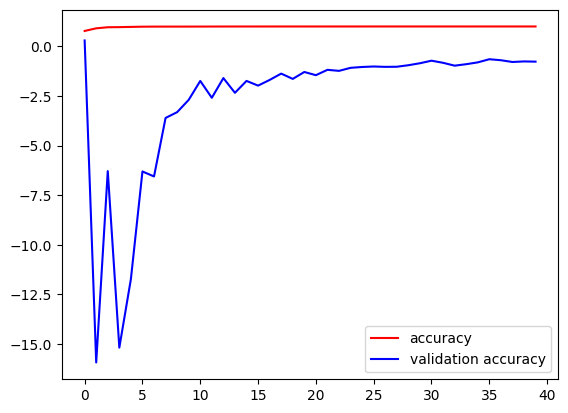

In [41]:
import matplotlib.pyplot as plt
plt.plot(new_model.history["accuracy"] , color="red" , label="accuracy")
plt.plot(new_model.history["val_accuracy"] , color="blue" , label="validation accuracy")
plt.legend()
plt.show()

In [43]:
test_loss, test_r2 = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test R² Score: {test_r2}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: -2521.3037 - loss: 2.1016
Test Loss: 2.101647138595581
Test R² Score: -2521.3037109375
